In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'd:\\HierarchicalCode\\experiment\\EDA'

In [4]:
data = pd.read_csv('../Data/Tourism/Tourism.csv')
data.shape

(228, 306)

In [5]:
print(data.columns)

Index(['Year', 'Month', 'AAAHol', 'AAAVis', 'AAABus', 'AAAOth', 'AABHol',
       'AABVis', 'AABBus', 'AABOth',
       ...
       'GBBBus', 'GBBOth', 'GBCHol', 'GBCVis', 'GBCBus', 'GBCOth', 'GBDHol',
       'GBDVis', 'GBDBus', 'GBDOth'],
      dtype='object', length=306)


In [5]:
level_1,level_2,level_3 = [],[],[]
tags = [i for i in data.columns[2:]]
len(tags)

304

In [6]:
for i in tags:
    level_1.append(i[0])
    level_2.append(i[0:2])
    level_3.append(i[0:3])
level_1 = list(set(list(level_1)))
level_2 = list(set(list(level_2)))
level_3 = list(set(list(level_3)))
level_1.sort()
level_2.sort()
level_3.sort()

In [10]:
len(level_3)

76

In [21]:
data.head()

,Year,Month,AAAHol,AAAVis,AAABus,AAAOth,AABHol,AABVis,AABBus,AABOth,...,GBBBus,GBBOth,GBCHol,GBCVis,GBCBus,GBCOth,GBDHol,GBDVis,GBDBus,GBDOth
0,1998.0,January,2015.444457,1379.273926,230.099578,118.238146,936.208816,297.944688,0.000000,0.000000,...,0.000000,0.0,7.536223,0.000000,1.628948,0.000000,0.811856,0.000000,9.478051,0.0
1,NaN,February,514.337600,645.980857,450.509894,80.836085,139.829461,96.072530,3.800647,5.862538,...,1.045797,0.0,0.000000,0.000000,5.296459,0.000000,0.522899,0.000000,0.000000,0.0
2,NaN,March,532.097470,683.284592,520.458259,138.306554,117.980175,97.113121,28.431680,0.000000,...,0.000000,0.0,2.945006,1.425324,9.924744,3.100121,0.000000,0.000000,0.000000,0.0
3,NaN,April,534.059083,819.807646,755.506898,97.089844,202.266724,196.414355,10.812915,0.000000,...,11.461824,0.0,26.419176,13.690603,2.312088,0.000000,0.000000,10.958005,2.312088,0.0
4,NaN,May,505.222272,693.531752,880.152314,82.210784,121.775526,73.542768,12.185418,24.524678,...,0.000000,0.0,23.789282,67.846207,1.282767,0.000000,0.000000,0.000000,0.000000,0.0


In [8]:
data.iloc[:,2:] = data.iloc[:,2:].applymap(lambda x: round(x, 7))

In [9]:
data.iloc[1,3]

645.9808573

In [10]:
new_data = data.iloc[:,0:2]
new_data.head()

,Year,Month
0,1998.0,January
1,NaN,February
2,NaN,March
3,NaN,April
4,NaN,May


In [11]:
new_data['Year'] = new_data['Year'].fillna(method='ffill')
new_data['Month'] = pd.to_datetime(new_data['Month'],format='%B').dt.month
new_data.head()

,Year,Month
0,1998.0,1
1,1998.0,2
2,1998.0,3
3,1998.0,4
4,1998.0,5


In [12]:
new_data['T'] = data.iloc[:,2:].sum(axis=1).round(7)
new_data.head()

,Year,Month,T
0,1998.0,1,45151.071280
1,1998.0,2,17294.699551
2,1998.0,3,20725.114184
3,1998.0,4,25388.612353
4,1998.0,5,20330.035211


In [13]:
new_data.iloc[0,2]

45151.0712801

In [14]:
for i in level_1:
    columns_to_aggregate = [col for col in tags if col.startswith(i)]
    new_data[i] = data[columns_to_aggregate].sum(axis=1).round(7)
new_data.head()

,Year,Month,T,A,B,C,D,E,F,G
0,1998.0,1,45151.071280,17515.502380,10393.618016,8633.359047,3504.313346,3121.619189,1850.735774,131.923529
1,1998.0,2,17294.699551,5880.367918,3855.647839,3580.051065,1321.257992,1826.610676,757.079744,73.684316
2,1998.0,3,20725.114184,7086.444392,4353.379282,4717.676663,1521.950007,1868.381530,900.796622,276.485688
3,1998.0,4,25388.612353,10530.639348,5115.865531,4924.575204,1813.439177,1952.612466,801.444140,250.036488
4,1998.0,5,20330.035211,7430.373559,3820.666426,4219.283647,1375.082095,2616.965317,551.377058,316.287109


In [15]:
for i in level_2:
    columns_to_aggregate = [col for col in tags if col.startswith(i)]
    new_data[i] = data[columns_to_aggregate].sum(axis=1).round(7)
new_data.head()

,Year,Month,T,A,B,C,D,E,F,G,...,DC,DD,EA,EB,EC,FA,FB,FC,GA,GB
0,1998.0,1,45151.071280,17515.502380,10393.618016,8633.359047,3504.313346,3121.619189,1850.735774,131.923529,...,580.701969,520.723508,2568.148767,263.570342,289.900081,847.973579,760.292613,242.469582,70.560554,61.362975
1,1998.0,2,17294.699551,5880.367918,3855.647839,3580.051065,1321.257992,1826.610676,757.079744,73.684316,...,173.478450,277.077004,1315.218525,360.128887,151.263265,227.802704,407.371145,121.905895,61.959070,11.725246
2,1998.0,3,20725.114184,7086.444392,4353.379282,4717.676663,1521.950007,1868.381530,900.796622,276.485688,...,129.828048,214.034065,1545.311658,87.303887,235.765986,518.533429,239.226790,143.036403,254.227684,22.258005
3,1998.0,4,25388.612353,10530.639348,5115.865531,4924.575204,1813.439177,1952.612466,801.444140,250.036488,...,319.474072,322.889950,1556.823571,114.391442,281.397452,383.311108,255.855684,162.277348,179.062095,70.974393
4,1998.0,5,20330.035211,7430.373559,3820.666426,4219.283647,1375.082095,2616.965317,551.377058,316.287109,...,229.025076,167.874616,1304.885311,1163.877027,148.202978,246.079204,229.181643,76.116212,200.862317,115.424792


In [36]:
level_3

['AAA',
 'AAB',
 'ABA',
 'ABB',
 'ACA',
 'ADA',
 'ADB',
 'ADC',
 'ADD',
 'AEA',
 'AEB',
 'AEC',
 'AED',
 'AFA',
 'BAA',
 'BAB',
 'BAC',
 'BBA',
 'BCA',
 'BCB',
 'BCC',
 'BDA',
 'BDB',
 'BDC',
 'BDD',
 'BDE',
 'BDF',
 'BEA',
 'BEB',
 'BEC',
 'BED',
 'BEE',
 'BEF',
 'BEG',
 'BEH',
 'CAA',
 'CAB',
 'CAC',
 'CBA',
 'CBB',
 'CBC',
 'CBD',
 'CCA',
 'CCB',
 'CCC',
 'CDA',
 'CDB',
 'DAA',
 'DAB',
 'DAC',
 'DBA',
 'DBB',
 'DBC',
 'DCA',
 'DCB',
 'DCC',
 'DCD',
 'DDA',
 'DDB',
 'EAA',
 'EAB',
 'EAC',
 'EBA',
 'ECA',
 'FAA',
 'FBA',
 'FBB',
 'FCA',
 'FCB',
 'GAA',
 'GAB',
 'GAC',
 'GBA',
 'GBB',
 'GBC',
 'GBD']

In [16]:
for i in level_3:
    columns_to_aggregate = [col for col in tags if col.startswith(i)]
    new_data[i] = data[columns_to_aggregate].sum(axis=1).round(7)
new_data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14552\1515366886.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[i] = data[columns_to_aggregate].sum(axis=1).round(7)


,Year,Month,T,A,B,C,D,E,F,G,...,FBB,FCA,FCB,GAA,GAB,GAC,GBA,GBB,GBC,GBD
0,1998.0,1,45151.071280,17515.502380,10393.618016,8633.359047,3504.313346,3121.619189,1850.735774,131.923529,...,531.590022,195.512426,46.957156,46.848028,2.584923,21.127603,22.131027,19.776870,9.165171,10.289907
1,1998.0,2,17294.699551,5880.367918,3855.647839,3580.051065,1321.257992,1826.610676,757.079744,73.684316,...,257.746664,93.882862,28.023033,44.456176,5.687391,11.815504,1.199800,4.706087,5.296459,0.522899
2,1998.0,3,20725.114184,7086.444392,4353.379282,4717.676663,1521.950007,1868.381530,900.796622,276.485688,...,169.789166,114.067194,28.969209,204.127403,17.247262,32.853019,3.973355,0.889453,17.395196,0.000000
3,1998.0,4,25388.612353,10530.639348,5115.865531,4924.575204,1813.439177,1952.612466,801.444140,250.036488,...,151.483965,119.710116,42.567232,148.208669,25.497905,5.355521,0.000000,15.282432,42.421868,13.270093
4,1998.0,5,20330.035211,7430.373559,3820.666426,4219.283647,1375.082095,2616.965317,551.377058,316.287109,...,179.807921,59.264950,16.851261,115.786396,63.965084,21.110838,2.628572,19.877964,92.918256,0.000000


In [37]:
new_data.head()

,Year,Month,T,A,B,C,D,E,F,G,...,FBB,FCA,FCB,GAA,GAB,GAC,GBA,GBB,GBC,GBD
0,1998.0,1,45151.071280,17515.502380,10393.618016,8633.359047,3504.313346,3121.619189,1850.735774,131.923529,...,531.590022,195.512426,46.957156,46.848028,2.584923,21.127603,22.131027,19.776870,9.165171,10.289907
1,1998.0,2,17294.699551,5880.367918,3855.647839,3580.051065,1321.257992,1826.610676,757.079744,73.684316,...,257.746664,93.882862,28.023033,44.456176,5.687391,11.815504,1.199800,4.706087,5.296459,0.522899
2,1998.0,3,20725.114184,7086.444392,4353.379282,4717.676663,1521.950007,1868.381530,900.796622,276.485688,...,169.789166,114.067194,28.969209,204.127403,17.247262,32.853019,3.973355,0.889453,17.395196,0.000000
3,1998.0,4,25388.612353,10530.639348,5115.865531,4924.575204,1813.439177,1952.612466,801.444140,250.036488,...,151.483965,119.710116,42.567232,148.208669,25.497905,5.355521,0.000000,15.282432,42.421868,13.270093
4,1998.0,5,20330.035211,7430.373559,3820.666426,4219.283647,1375.082095,2616.965317,551.377058,316.287109,...,179.807921,59.264950,16.851261,115.786396,63.965084,21.110838,2.628572,19.877964,92.918256,0.000000


In [41]:
new_data.iloc[0,2]

45151.0712801

In [42]:
new_data.to_csv('../Data/Tourism/Tourism_process.csv',index=False)

In [43]:
new_data.shape

(228, 113)

In [44]:
len(level_3)

76

In [45]:
import numpy as np
S = np.zeros((111,76))
S[0,:] = [1 for i in range(76)]
S

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
level = new_data.columns[2:]
print(len(level))

111


In [47]:
for j in range(76):
    for i in range(1,111):
        if level_3[j].startswith(level[i]):
            S[i,j] = 1
S


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [59]:
import json
S_mat = S.tolist()
with open('../Data/Tourism/Tourism_Smat.json','w') as file:
    file.write(json.dumps(S_mat,indent=4))

In [48]:
print(len(level_1),len(level_2),len(level_3))

7 27 76


In [49]:
data.iloc[:,2:].isnull().values.any()

False

In [50]:
new_data.dtypes

Year     float64
Month      int64
T        float64
A        float64
B        float64
          ...   
GAC      float64
GBA      float64
GBB      float64
GBC      float64
GBD      float64
Length: 113, dtype: object

In [51]:
count_zero = (new_data.iloc[:,-76:] < 100).sum(axis=0)
count_zero

AAA      0
AAB      1
ABA      0
ABB      0
ACA      0
      ... 
GAC    182
GBA    227
GBB    216
GBC    151
GBD    226
Length: 76, dtype: int64

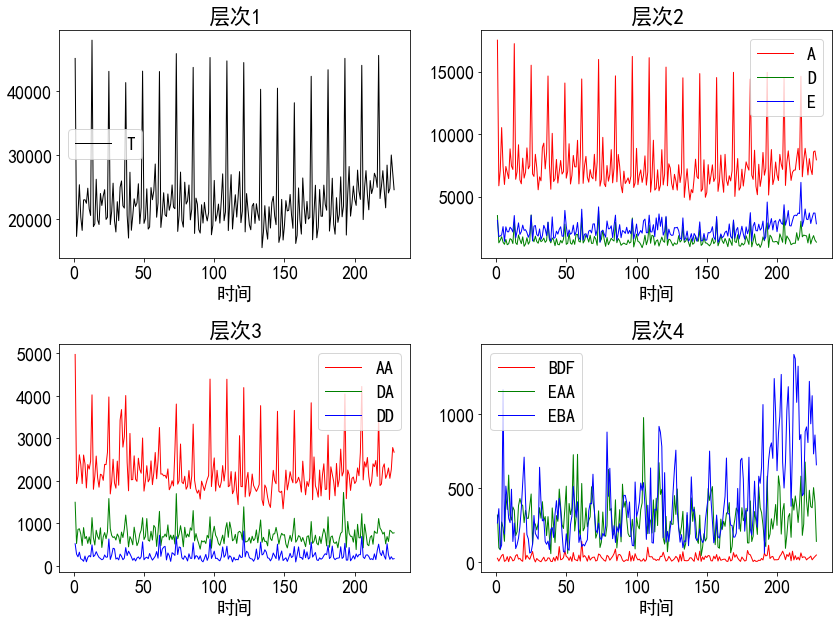

In [19]:
import random
random.seed(10)
l1 = random.sample(level_1,3)
l2 = random.sample(level_2,3)
l3 = random.sample(level_3,3)
l1.sort()
l2.sort()
l3.sort()

config = {
    "font.family": 'serif',
    "font.size": 18,
    "mathtext.fontset": 'stix',
    "font.serif": ['SimHei'],
}
plt.rcParams.update(config)

x = [i for i in range(1,229)]

fig,axs = plt.subplots(2,2,figsize = (12,9))
axs[0,0].plot(x,new_data['T'],label='T',color='black',linewidth=1)
axs[0,0].legend()
axs[0,0].set_title('层次1')
axs[0,0].set_xlabel('时间')

colors = ['red','green','blue']
for i in range(3):
    axs[0,1].plot(x,new_data[l1[i]],label=l1[i],color=colors[i],linewidth=1)
axs[0,1].legend()
axs[0,1].set_title('层次2')
axs[0,1].set_xlabel('时间')

for i in range(3):
    axs[1,0].plot(x,new_data[l2[i]],label=l2[i],color=colors[i],linewidth=1)
axs[1,0].legend()
axs[1,0].set_title('层次3')
axs[1,0].set_xlabel('时间')

for i in range(3):
    axs[1,1].plot(x,new_data[l3[i]],label=l3[i],color=colors[i],linewidth=1)
axs[1,1].legend()
axs[1,1].set_title('层次4')
axs[1,1].set_xlabel('时间')

plt.tight_layout()

plt.savefig('../Plot_new/Tourism/plot_data.png')
plt.show()

In [56]:
from_list = []
to_list = []

for i in range(len(level_1)):
    from_list.append('T')
    to_list.append(level_1[i])

for i in level_1:
    for j in level_2:
        if j.startswith(i):
            from_list.append(i)
            to_list.append(j)

for i in level_2:
    for j in level_3:
        if j.startswith(i):
            from_list.append(i)
            to_list.append(j)

In [59]:
len(from_list)

110

In [62]:
import json
a = [from_list,to_list]
with open('../Plot_new/Tourism/Hierarchy_info.json','w') as file:
    file.write(json.dumps(a))